In [1]:
# This notebook shows how Figure 14 from the Aboa paper was produced.
# 
# Citation
# Andrei et al. (2018)
# GPS Time Series Analysis from Aboa the Finnish Antarctic Research Station, 
# Remote Sensing, 10(12), ISSN: 2072-4292, 2018, DOI: 10.3390/rs10121937
#
# link: https://www.mdpi.com/2072-4292/10/12/1937/htm
#
# Compiled by Octavian Andrei, 2020

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

import os
from astropy.time import Time


## Input data

In [3]:
# input files
files = (
    'aboa_gipsy_Up_pl_noseas.mom',
    'aboa_gipsy_Up_pl.mom',
)
files

('aboa_gipsy_Up_pl_noseas.mom', 'aboa_gipsy_Up_pl.mom')

In [4]:
# customised function
def read_pre_mom(fpath):
    """Reads mom files"""
    col = os.path.basename(fpath).split('_')[2]
    B = pd.read_csv(fpath, header=None, comment='#', delim_whitespace=True, usecols=[0,1,2], names=['MJD', col+'_original', col+'_model'])
    B['DATETIME'] = pd.to_datetime(Time(B['MJD'], format='mjd').datetime)
    B[col+'_residuals'] = B[col+'_original'] - B[col+'_model']
    B.set_index('DATETIME',inplace=True)
    
    return B


# Signal decomposion for the Up component

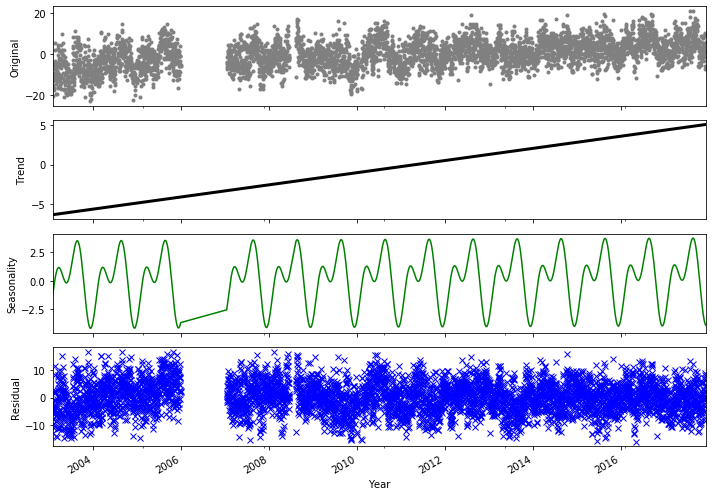

In [5]:
# first, read original and model
finp = files[0]
X = read_pre_mom(finp)[['Up_original', 'Up_model']]
X.columns = ['Original', 'Trend']

# now, read seasonality
finp = files[1]
X['Seasonality'] = read_pre_mom(finp)['Up_model']

# decimal year
X['Year'] = X.index.map(lambda x: Time(x).decimalyear)
X = X['2003':]

# new figure
fig, axarr = plt.subplots(4,1, figsize=(10,7), sharex=True)

# orginal series
col = 'Original'; 
ax = axarr[0]
X[col].plot(ax=ax, marker='.', ls='None', color='gray')
ax.set_ylabel(col)

# trend series
col = 'Trend'; 
ax = axarr[1]
X[col].plot(ax=ax, color='black', lw=3)
ax.set_ylabel(col)

# seasonality series
col = 'Seasonality'; 
ax = axarr[2]
DX = X[col] - X['Trend']
DX.plot(ax=ax, color='green')
ax.set_ylabel(col)

# residual series
col = 'Residual'; 
ax = axarr[3]
DX = X['Original'] - X['Seasonality']
DX.plot(ax=ax,  marker='x', ls='None', color='blue')
ax.set_ylabel(col)

ax.set_xlabel('Year')

plt.tight_layout()
